3377 3377
[ 1083.49335139  1056.60503202  1056.43792044  1045.04144897  1031.22382956
  1038.95835134  1053.15992699  1065.38172817  1070.13182025  1073.09201021
  1068.92817777  1072.40920946  1078.06308049  1092.56437887  1106.55304582
  1101.09232178  1094.60656404  1091.99682926  1090.3661724   1087.30577082
  1081.21288155  1076.87108698  1074.49633397  1094.30983622  1112.71982041
  1117.01227351  1131.90997769  1135.92300494  1134.44297075  1132.0172933
  1133.75516716  1152.40172044  1151.55913955  1161.34086434  1157.93452202] 0.978856956172 35


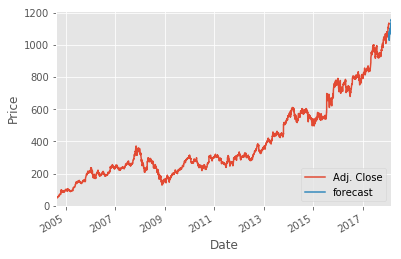

In [57]:
import quandl, datetime
import sklearn
import pandas as pd
import math as mt
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df=quandl.get('WIKI/GOOGL')
#print (df.head())
df=df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',]]
df['HL_PCT']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Close']*100.0
#print (df['HL_PCT']) #shows high/low percent
df['PCT_change']=(df['Adj. High']-df['Adj. Close'])/df['Adj. Open']*100.0 #shows % change

df=df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

#print (df.head())
forecast_col='Adj. Close'
df.fillna('-99999', inplace=True)
forecast_out=int(mt.ceil(0.01*len(df)))
df['label']=df[forecast_col].shift(-forecast_out)

#print (df.head())
#print (df.tail())

X=np.array(df.drop(['label'],1))
X=X[:-forecast_out]
X=preprocessing.scale(X)
X_lately=X[-forecast_out:]

df.dropna(inplace=True)
y=np.array(df['label'])
y=np.array(df['label'])

print (len(X),len(y))

X_train, X_test, y_train, y_test= cross_validation.train_test_split(X,y, test_size=0.2)
clf=LinearRegression(n_jobs=10)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test, y_test)

forecast_set=clf.predict(X_lately)
print (forecast_set, accuracy, forecast_out)

df['forecast']=np.nan

last_date=df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix + one_day

for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()